Messdaten im table - Format

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Daten importieren
runderstabein = pd.read_excel(r"tables/runderstabeinseitig.xlsx")       ;lrund = 0.59; mrund = 0.4122
eckigerstabein = pd.read_excel(r"tables/eckigerstabeinseitig.xlsx")     ;leck = 0.602; meck = 0.5365
runderstabbeid = pd.read_excel(r"tables/runderstabbeidseitig.xlsx")     
eckigerstabbeid = pd.read_excel(r"tables/eckigerstabbeidseitig.xlsx")   

################################################
# Tabellen ergänzen durch D(x) und Approximation
################################################

# Für einseitige Einspannung
def func1(l,x):
    x = x * 10**(-3)
    rtn = (l * x**2 - x**3 / 3) * 10**(3)
    return rtn

# Für beidseitige Einspannung
def func2(l,x):
    x = x * 10**(-3)
    rtn = (3*l**2 * x - 4 * x**3) * 10**(3)
    return rtn

################################
# Runder Stab einseitig
arr1 = pd.DataFrame(runderstabein).to_numpy()
dx1 = arr1[:,2] - arr1[:,1]
approx1 = (func1(lrund, arr1[:,0]))
arr1 = np.c_[arr1, dx1, approx1]

# Eckiger Stab einseitig
arr2 = pd.DataFrame(eckigerstabein).to_numpy()
dx2 = arr2[:,2] - arr2[:,1]
approx2 = func1(leck, arr2[:,0])
arr2 = np.c_[arr2, dx2, approx2]

################################
# Runder Stab beidseitig
arr3 = pd.DataFrame(runderstabbeid).to_numpy()
dx3 = arr3[:,2] - arr3[:,1]
approx3 = func2(lrund, arr3[:,0])
arr3 = np.c_[arr3, dx3, approx3]

# Eckiger Stab beidseitig
arr4 = pd.DataFrame(eckigerstabbeid).to_numpy()
dx4 = arr4[:,2] - arr4[:,1]
approx4 = func2(leck, arr4[:,0])
arr4 = np.c_[arr4, dx4, approx4]

################################
# Tabellen umwandeln und printen
################################

# Tabellen umwandeln zu Excel (für print to Latex)
arr1 =  pd.DataFrame(data=arr1)
arr2 =  pd.DataFrame(data=arr2)
arr3 =  pd.DataFrame(data=arr3)
arr4 =  pd.DataFrame(data=arr4)

# Tabellen erstellen
#print(arr1.to_latex(index = False, column_format= "c c c c c", na_rep = "-", float_format="%.3f"))
#print(arr2.to_latex(index = False, column_format= "c c c c c", na_rep = "-", float_format="%.3f"))
print(arr3.to_latex(index = False, column_format= "c c c c c", na_rep = "-", float_format="%.3f"))
#print(arr4.to_latex(index = False, column_format= "c c c c c", na_rep = "-", float_format="%.3f"))

Erstmal den Plot verstehen

a = 0.0254 ± 0.0003
b = 0.0401 ± 0.0138


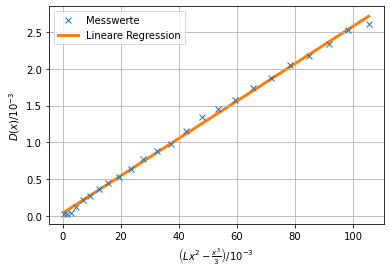

In [11]:
# Lineare Regression
np.set_printoptions(suppress=True)

#Daten
arrquer = pd.DataFrame(arr3).to_numpy()

dx = arrquer[:,3]
Ausgl = arrquer[:,4]

#Ausgleichsrechnung

params, covariance_matrix = np.polyfit(Ausgl, dx, deg=1, cov=True)

errors = np.sqrt(np.diag(covariance_matrix))

for name, value, error in zip('ab', params, errors):
    print(f'{name} = {value:.4f} ± {error:.4f}')

x_plot = np.linspace(Ausgl[0], Ausgl[23])
plt.plot(Ausgl, dx, 'x',label="Messwerte", zorder=2)
plt.plot(
    x_plot,
    params[0] * x_plot + params[1],
    label='Lineare Regression',
    linewidth=3,
    zorder=1,
)
plt.xlabel(r'$\left(Lx^2 - \frac{x^3}{3}\right) / 10^{-3}$')
plt.ylabel(r'$D(x)  / 10^{-3}$')
plt.grid()
plt.legend(loc="best")

#Speichern des Plots (und überprüfen ob schon vorhanden)
path = '/pictures/'
if os.path.exists('Lineare Regression2.pdf'):
    os.remove('Lineare Regression2.pdf')
plt.savefig('pictures/Lineare Regression2.pdf')

Berechung des Flächenträgheits/- und Elastizitätsmodul

In [5]:
from uncertainties import ufloat

def elast(m, I, a):
    E = (m*9.81) / (2 * a * I)
    return E

#def elastKreis(m, I, a):
#    E = (m * 9.81) / (48 * I * a)
#    return E

def IQuad(h):
    return ((h**4) / 12)

def IKreis(R):
    return ((np.pi * R**4) / 4)
    
a = ufloat(0.0380, 0.0004)

print(elast(mrund, IKreis(0.005) , a) * 10**(-9))

108.4+/-1.1
